In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set(font_path='Arial')

# Enable auto-reload for development
%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA H100 80GB HBM3
    • Total memory: 79.1 GB
    • Compute capability: 9.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



- s1d3: https://figshare.com/ndownloader/files/41932005
- s2d1: https://figshare.com/ndownloader/files/41932011
- s3d7: https://figshare.com/ndownloader/files/41932008

In [2]:
adata1=ov.read('data/neurips2021_s1d3.h5ad')
adata1.obs['batch']='s1d3'
adata2=ov.read('data/neurips2021_s2d1.h5ad')
adata2.obs['batch']='s2d1'
adata3=ov.read('data/neurips2021_s3d7.h5ad')
adata3.obs['batch']='s3d7'

In [3]:
adata=sc.concat([adata1,adata2,adata3],merge='same')
adata

AnnData object with n_obs × n_vars = 27423 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

## scGPT

we need to download the model checkpoint from here: https://drive.google.com/drive/folders/1oWh_-ZRdhtoGQ2Fw24HP41FgLoomVo-y/

In [5]:
#!/usr/bin/env python3
import os
import gdown

folder_url = 'https://drive.google.com/drive/folders/1oWh_-ZRdhtoGQ2Fw24HP41FgLoomVo-y'

output_dir = 'llm_model/models/scgpt'

os.makedirs(output_dir, exist_ok=True)

gdown.download_folder(
    url=folder_url,
    output=output_dir,
    quiet=False,        # 显示下载进度
    use_cookies=False   # 根据需要切换
)

Retrieving folder contents


Processing file 1hh2zGKyWAx3DyovD30GStZ3QlzmSqdk1 args.json
Processing file 14AebJfGOUF047Eg40hk57HCtrb0fyDTm best_model.pt
Processing file 1H3E_MJ-Dl36AQV6jLbna2EdvgPaqvqcC vocab.json


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hh2zGKyWAx3DyovD30GStZ3QlzmSqdk1
To: /scratch/users/steorra/analysis/25_scllm/llm_model/models/scgpt/args.json
100%|██████████| 1.30k/1.30k [00:00<00:00, 11.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14AebJfGOUF047Eg40hk57HCtrb0fyDTm
From (redirected): https://drive.google.com/uc?id=14AebJfGOUF047Eg40hk57HCtrb0fyDTm&confirm=t&uuid=bce7552f-cae8-4820-9be5-29a0beb12b2a
To: /scratch/users/steorra/analysis/25_scllm/llm_model/models/scgpt/best_model.pt
100%|██████████| 205M/205M [00:04<00:00, 43.6MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1H3E_MJ-Dl36AQV6jLbna2EdvgPaqvqcC
To: /scratch/users/steorra/analysis/25_scllm/llm_model/models/scgpt/vocab.json
100%|██████████| 1.32M/1.32M [00:00<00:00, 15.2MB/s]
Download completed


['llm_model/models/scgpt/args.json',
 'llm_model/models/scgpt/best_model.pt',
 'llm_model/models/scgpt/vocab.json']

In [4]:
manager = ov.llm.SCLLMManager(
    model_type="scgpt",
    model_path="llm_model/models/scgpt",
)

[Loaded] Loaded vocabulary: 60,697 genes
[Loaded] Loaded model config from args.json
[ℹ️] Key Parameters Model Information:
    embsize: 512
    nheads: 8
    d_hid: 512
    nlayers: 12
    n_layers_cls: 3
[Preprocessing] Analyzing model checkpoint for n_cls inference...
[Warning] No classifier layers found in checkpoint
[ℹ️] Using default n_cls=50
[Warning] Loading compatible weights only
[Loaded] Compatible weights loaded: 135/163
[Warning] Some weights incompatible (28)
[ℹ️] Model classes: 50
[Loaded] Model ready on cuda


In [5]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',
                       n_HVGs=3000,batch_key=None,target_sum=1e4)
adata

Begin robust gene identification
After filtration, 13953/13953 genes are kept.     Among 13953 genes, 13953 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell
The following highly-expressed genes are not considered during normalization factor computation:
['IGKC', 'HBB', 'MALAT1', 'IGHA1', 'IGHM', 'HBA2', 'IGLC1', 'IGLC2', 'IGLC3']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 3.081930160522461 seconds.
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 27423 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
adata

View of AnnData object with n_obs × n_vars = 27423 × 3000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

### zero-shot embedding

[Cells] Data Summary:
    Cells: 27,423
    Genes: 3,000
    Batches: 3
      s3d7: 11,230 cells
      s2d1: 10,258 cells
      s1d3: 5,935 cells
[Embedding] Starting get_embeddings...
    cells: 27,423
    genes: 3,000
[Preprocessing] Filtering genes by vocabulary
[ℹ️] Matched 2738/3000 genes
[Loaded] Retained 2738 genes
[Loaded] Preprocessor initialized
    n_bins: 51, normalize: 10000.0
[ℹ️] Data inspection - Mean: 1085.7, Range: [0.000, 11.615]
    [ℹ️] Auto-detected: raw counts
    [Warning] User override: skipping normalization
    [Preprocessing] Adjusting preprocessor settings
[Preprocessing] Applying preprocessing pipeline
Binning data ...
    [Loaded] Preprocessor settings restored
[Loaded] Preprocessing completed
[Loaded] Binned data: (27423, 2738), 51 unique values
    Data shape: (27423, 2738)
    Data range: [0.000, 50.000]
    Gene IDs: 2738 genes mapped
    [Preprocessing] Tokenizing data...
    Tokenized: 27423 cells x 1200 tokens
    Created dataloader: 857 batches (b

[scGPT] Prediction batches:   0%|          | 2/857 [00:00<01:08, 12.50it/s]

        Batch shape: torch.Size([32, 1200])
        Padding tokens: 17283
        Embeddings: 512 dimensions


    Predictions: 2 classes for 27,423 cells
    Extracted embeddings: (27423, 512)
[Complete] get_embeddings completed successfully!
[Complete] Results summary:
    embedding_shape: (27423, 512)
    embedding_dim: 512
embedding: (27423, 512)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:18)


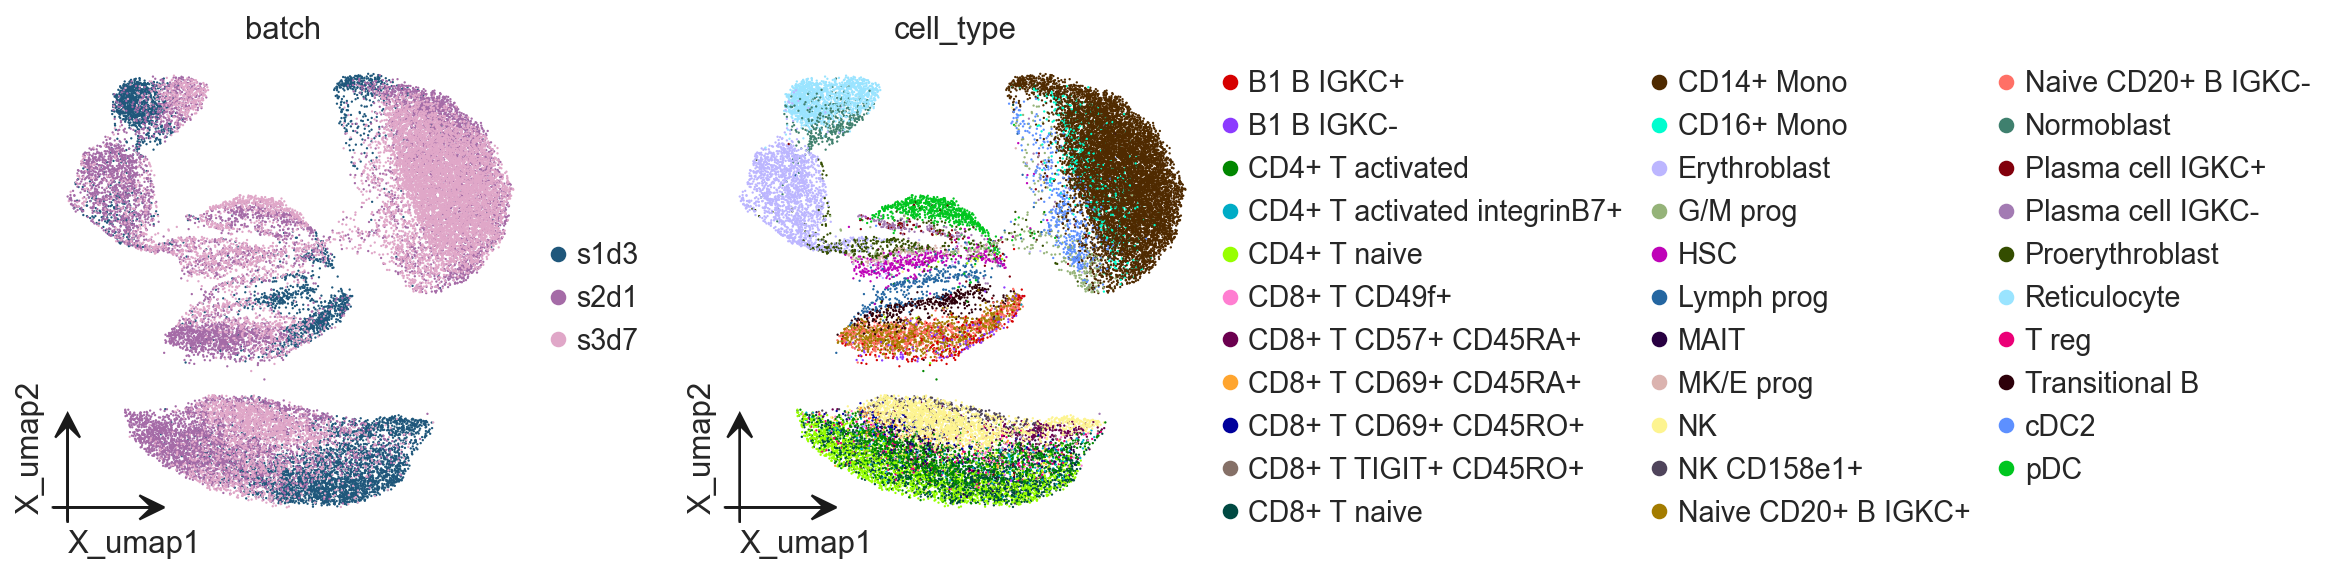

In [7]:
embeddings = manager.get_embeddings(adata,skip_normalization=True,)
print(f"embedding: {embeddings.shape}")

adata.obsm['X_scgpt'] = embeddings

sc.pp.neighbors(adata, use_rep='X_scgpt')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

### fine-tune

In [8]:
reference_adata=adata[adata.obs['batch']=='s1d3']

In [9]:
reference_adata.obs['celltype']=reference_adata.obs['cell_type'].copy()

In [10]:
fine_tune_results = manager.model.fine_tune(
    train_adata=reference_adata,
    epochs=5,           # 
    batch_size=32,       # 
    lr=1e-4,            # 
    mask_ratio=0.0,      # 
    data_is_raw=False,
    log1p=False,
    skip_normalization=True,
)



[SCGPT] FINE-TUNING FOR ANNOTATION TASK
[ℹ️] Training Configuration Model Information:
    epochs: 5
    batch_size: 32
    learning_rate: 0.0001
    mask_ratio: 0.0
[ℹ️] Cell types: 30 classes
[Preprocessing] Preprocessing data...
[Preprocessing] Filtering genes by vocabulary
[ℹ️] Matched 2738/3000 genes
[Loaded] Retained 2738 genes
[ℹ️] Data inspection - Mean: 1013.7, Range: [0.000, 11.387]
    [ℹ️] Auto-detected: raw counts
    [Warning] User override: skipping normalization
    [Preprocessing] Adjusting preprocessor settings
[Preprocessing] Applying preprocessing pipeline
Binning data ...
    [Loaded] Preprocessor settings restored
[Loaded] Preprocessing completed
[Loaded] Binned data: (5935, 2738), 51 unique values
[Preprocessing] Updating classifier: 50 → 30 classes
[Loaded] Classifier updated
[Training] Starting training...


[Loaded] Loaded best model (accuracy: 0.8239)


In [11]:
zero_shot_results = manager.model.integrate(
    adata,
    batch_key="batch",
    correction_method="mnn",
    log1p=False,
    data_is_raw=False,
    skip_normalization=True,
)
adata.obsm['X_scgpt_fine'] = zero_shot_results['embeddings']

[ℹ️] Using pre-trained model with post-hoc correction
    [Embedding] Extracting pre-trained embeddings
[Cells] Data Summary:
    Cells: 27,423
    Genes: 3,000
    Batches: 3
      s3d7: 11,230 cells
      s2d1: 10,258 cells
      s1d3: 5,935 cells
[Embedding] Starting get_embeddings...
    cells: 27,423
    genes: 3,000
[Preprocessing] Filtering genes by vocabulary
[ℹ️] Matched 2738/3000 genes
[Loaded] Retained 2738 genes
[ℹ️] Data inspection - Mean: 1085.7, Range: [0.000, 11.615]
    [ℹ️] Auto-detected: raw counts
    [Warning] User override: skipping normalization
    [Preprocessing] Adjusting preprocessor settings
[Preprocessing] Applying preprocessing pipeline
Binning data ...
    [Loaded] Preprocessor settings restored
[Loaded] Preprocessing completed
[Loaded] Binned data: (27423, 2738), 51 unique values
    Data shape: (27423, 2738)
    Data range: [0.000, 50.000]
    Gene IDs: 2738 genes mapped
    [Preprocessing] Tokenizing data...
    Tokenized: 27423 cells x 1200 tokens
   

[scGPT] Prediction batches:   0%|          | 4/857 [00:00<00:22, 38.54it/s]

        Batch shape: torch.Size([32, 1200])
        Padding tokens: 17283
        Embeddings: 512 dimensions


    Predictions: 23 classes for 27,423 cells
    Extracted embeddings: (27423, 512)
[Complete] get_embeddings completed successfully!
[Complete] Results summary:
    embedding_shape: (27423, 512)
    embedding_dim: 512
    [ℹ️] Found 3 batches
    [Preprocessing] Applying MNN-inspired correction
        [Loaded] MNN correction applied
[Loaded] Integration completed using mnn correction


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:17)


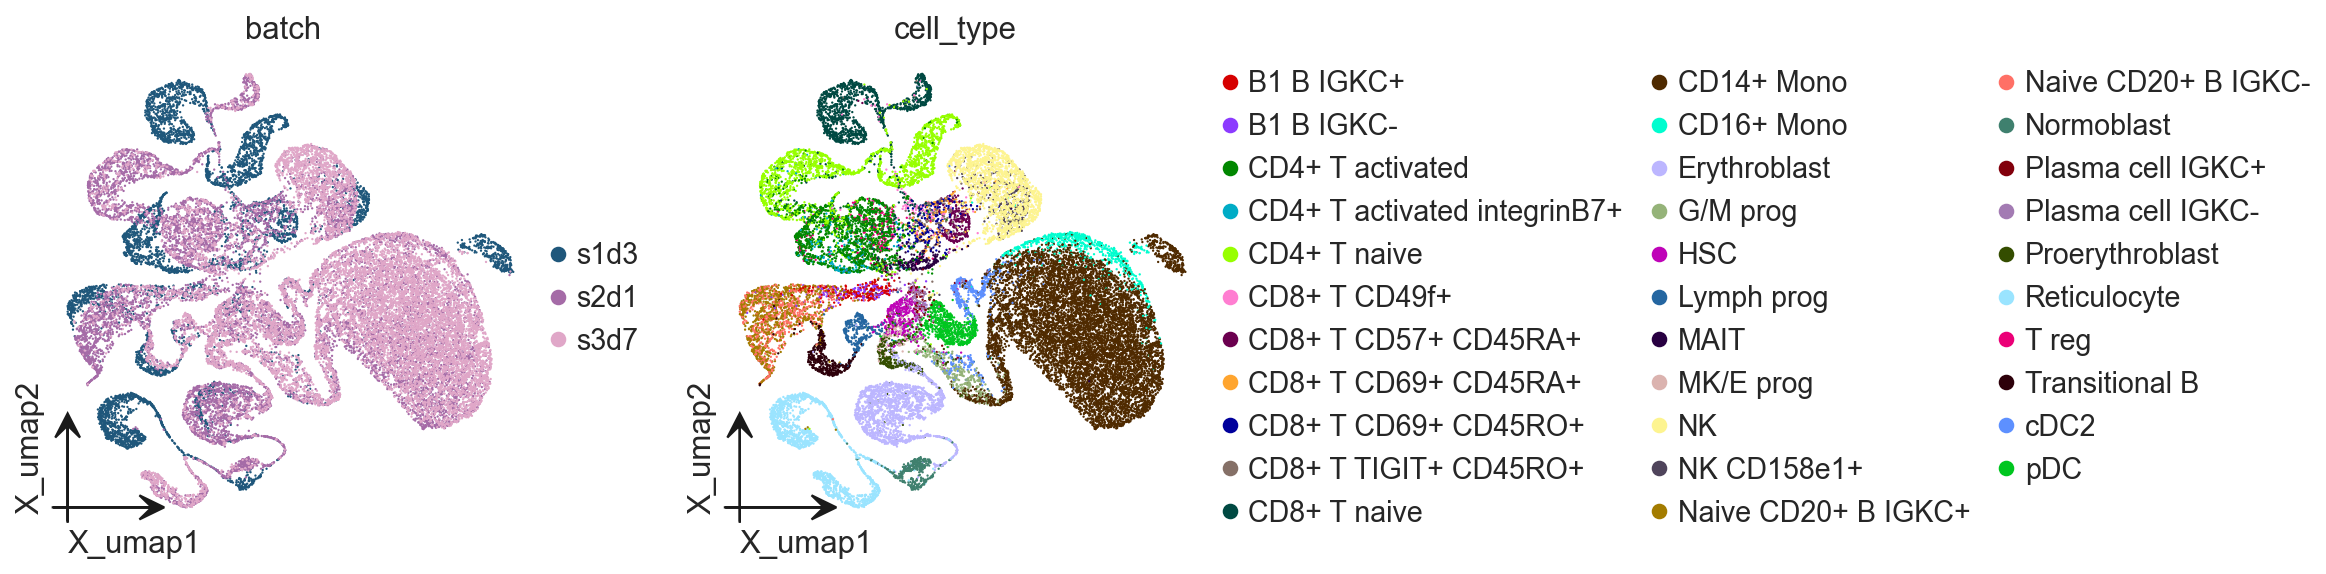

In [12]:
sc.pp.neighbors(adata, use_rep='X_scgpt_fine')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

### annotation

In [13]:
prediction_results = manager.model.predict_celltypes(
    adata,
    skip_normalization=True,
)

adata.obs['predicted_celltype'] = prediction_results['predicted_celltypes']
adata.obs['predicted_celltype_id'] = prediction_results['predictions']

[Predicting] Starting predict_celltypes...
    cells: 27,423
    genes: 3,000
    [Preprocessing] Preprocessing query data...
[Preprocessing] Filtering genes by vocabulary
[ℹ️] Matched 2738/3000 genes
[Loaded] Retained 2738 genes
[ℹ️] Data inspection - Mean: 1085.7, Range: [0.000, 11.615]
    [ℹ️] Auto-detected: raw counts
    [Warning] User override: skipping normalization
    [Preprocessing] Adjusting preprocessor settings
[Preprocessing] Applying preprocessing pipeline
Binning data ...
    [Loaded] Preprocessor settings restored
[Loaded] Preprocessing completed
[Loaded] Binned data: (27423, 2738), 51 unique values
    Data shape: (27423, 2738)
    Data range: [0.000, 50.000]
    Gene IDs: 2738 genes mapped
    [Preprocessing] Tokenizing data...
    Tokenized: 27423 cells x 1200 tokens
    Created dataloader: 857 batches (batch_size=32)
    [Predicting] Running model inference...


[scGPT] Prediction batches:   0%|          | 4/857 [00:00<00:22, 38.53it/s]

        Batch shape: torch.Size([32, 1200])
        Padding tokens: 17283
        Embeddings: 512 dimensions


    Predictions: 23 classes for 27,423 cells
    Extracted embeddings: (27423, 512)
[Complete] predict_celltypes completed successfully!
[Complete] Results summary:
    total_cells: 27,423
    unique_types: 23
    most_common: CD14+ Mono
    Cell type distribution:
        CD14+ Mono: 10,194 cells (37.2%)
        CD4+ T activated: 2,183 cells (8.0%)
        NK: 2,087 cells (7.6%)
        CD4+ T naive: 1,930 cells (7.0%)
        Erythroblast: 1,539 cells (5.6%)
        Reticulocyte: 1,506 cells (5.5%)
        HSC: 1,417 cells (5.2%)
        Naive CD20+ B IGKC+: 1,358 cells (5.0%)
        CD8+ T naive: 1,263 cells (4.6%)
        Lymph prog: 664 cells (2.4%)
        cDC2: 606 cells (2.2%)
        CD8+ T CD57+ CD45RA+: 552 cells (2.0%)
        Normoblast: 437 cells (1.6%)
        MAIT: 398 cells (1.5%)
        G/M prog: 339 cells (1.2%)
        Transitional B: 327 cells (1.2%)
        Naive CD20+ B IGKC-: 275 cells (1.0%)
        B1 B IGKC-: 153 cells (0.6%)
        Proerythroblast: 144 ce

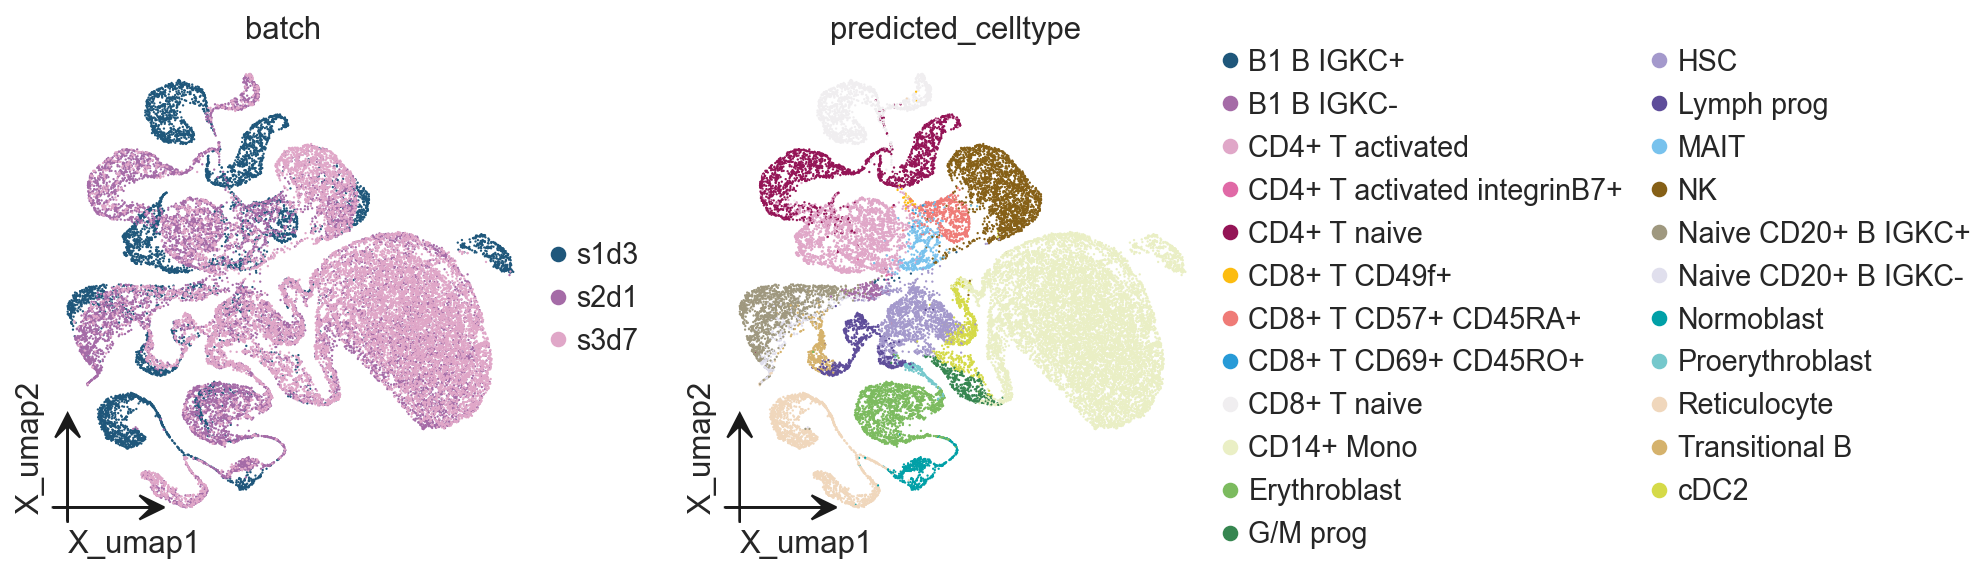

In [14]:
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'predicted_celltype']
)